In [105]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Importing the dataset
data=pd.read_csv("IEA Global EV Data 2024.csv")

print(data.head())

      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  


In [106]:
year_to_delete=[2010,2011,2012,2025,2030]
df=data.loc[~data['year'].isin(year_to_delete)]

#Deleting parameters which are not applicable for analysis
parameter_to_delete=['EV sales share', 'EV stock share','EV stock','Oil displacement, million lge','Oil displacement Mbd','EV charging points','Electricity demand']
df=df.loc[~df['parameter'].isin(parameter_to_delete)]

#Deleting categories which are not applicable for analysis
category_to_delete=['Projection-STEPS','Projection-APS']
df=df.loc[~df['category'].isin(category_to_delete)]
print(df)

          region    category parameter   mode powertrain  year      unit  \
10     Australia  Historical  EV sales   Cars       PHEV  2013  Vehicles   
14     Australia  Historical  EV sales   Cars        BEV  2013  Vehicles   
17     Australia  Historical  EV sales   Cars        BEV  2014  Vehicles   
21     Australia  Historical  EV sales   Cars       PHEV  2014  Vehicles   
22     Australia  Historical  EV sales   Cars       PHEV  2015  Vehicles   
...          ...         ...       ...    ...        ...   ...       ...   
12356      World  Historical  EV sales   Cars       FCEV  2023  Vehicles   
12357      World  Historical  EV sales   Vans       PHEV  2023  Vehicles   
12360      World  Historical  EV sales   Vans       FCEV  2023  Vehicles   
12362      World  Historical  EV sales   Vans        BEV  2023  Vehicles   
12364      World  Historical  EV sales  Buses       PHEV  2023  Vehicles   

          value  
10        100.0  
14        190.0  
17        370.0  
21        950.0

In [107]:
df = df.groupby('year')['value'].sum().reset_index()
df

,year,value
0,2013,5.535577e+05
1,2014,8.680802e+05
2,2015,1.633905e+06
3,2016,2.186306e+06
4,2017,3.351445e+06
5,2018,5.192548e+06
6,2019,5.557852e+06
7,2020,8.834555e+06
8,2021,1.783948e+07
9,2022,2.618958e+07


In [108]:
# Extract features (year) and target (value)
X = df[['year']]
y = df['value']

In [109]:
linearRegression = LinearRegression()
lr=linearRegression.fit(X,y)

In [110]:
# Make predictions for the next 5 years
forecast_years = 5
forecast = []
# Predict for the next 5 years
for year in range(2024, 2024 + forecast_years):
    prediction = linearRegression.predict(np.array([[year]]))
    forecast.append(prediction[0])

# Create a DataFrame for the forecasted years
forecast_df = pd.DataFrame({'year': range(2024, 2024 + forecast_years), 'value': forecast})
forecast_df

c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,year,value
0,2024,2.800726e+07
1,2025,3.105726e+07
2,2026,3.410726e+07
3,2027,3.715727e+07
4,2028,4.020727e+07


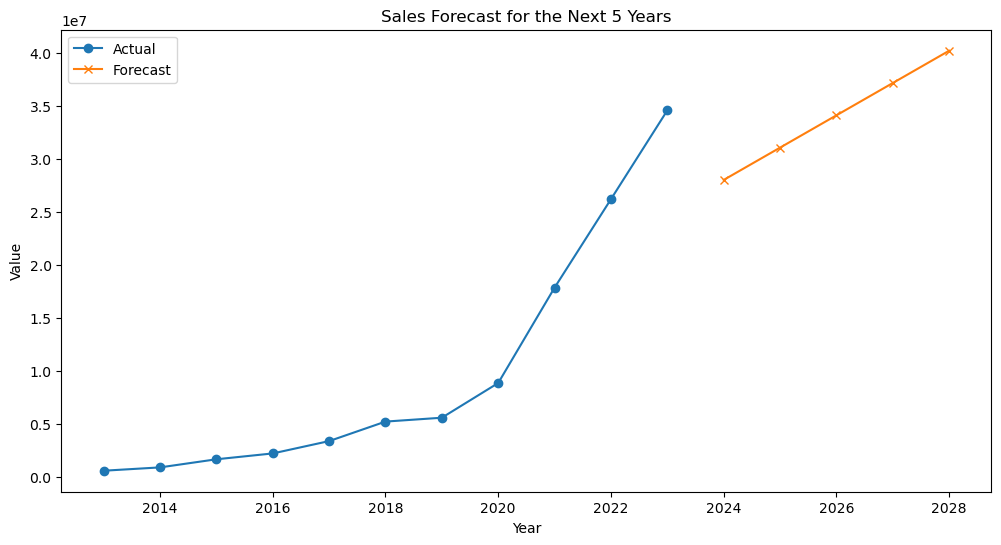

In [111]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['value'], label='Actual', marker='o')
plt.plot(forecast_df['year'], forecast_df['value'], label='Forecast', marker='x')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sales Forecast for the Next 5 Years')
plt.legend()
plt.show()

In [112]:
y_pred = lr.predict(X)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2=r2_score(y,y_pred)
print("R-Squared:", r2)

Mean Absolute Error: 4442060.41180982
Mean Squared Error: 26838699856801.39
Root Mean Squared Error: 5180608.058597117
R-Squared: 0.7760900208337502


In [113]:
# Append forecast_df to df and create a YOY calculation

real_and_forecast_sales = pd.concat([df, forecast_df], ignore_index=True)

real_and_forecast_sales['EV Sales YOY'] = real_and_forecast_sales['value'].pct_change(periods=1) * 100

# Print the DataFrame with YOY column
print(real_and_forecast_sales)

    year         value  EV Sales YOY
0   2013  5.535577e+05           NaN
1   2014  8.680802e+05     56.818377
2   2015  1.633905e+06     88.220512
3   2016  2.186306e+06     33.808636
4   2017  3.351445e+06     53.292586
5   2018  5.192548e+06     54.934603
6   2019  5.557852e+06      7.035159
7   2020  8.834555e+06     58.956284
8   2021  1.783948e+07    101.928450
9   2022  2.618958e+07     46.806852
10  2023  3.457247e+07     32.008487
11  2024  2.800726e+07    -18.989693
12  2025  3.105726e+07     10.890038
13  2026  3.410726e+07      9.820574
14  2027  3.715727e+07      8.942381
15  2028  4.020727e+07      8.208358


Creating a Similar Analysis for Electricity Demand, Stock, and Oil Displacement

In [114]:

year_to_delete=[2010,2011,2012,2025,2030]
new_df=data.loc[~data['year'].isin(year_to_delete)]

#Keeping only parameters which are applicable for analysis
parameter_to_keep=['EV stock','Oil displacement, million lge','Electricity demand']
new_df=new_df.loc[new_df['parameter'].isin(parameter_to_keep)]

#Deleting categories which are not applicable for analysis
category_to_delete=['Projection-STEPS','Projection-APS']
new_df=new_df.loc[~new_df['category'].isin(category_to_delete)]

print(new_df.head())


       region    category parameter  mode powertrain  year      unit   value
11  Australia  Historical  EV stock  Cars       PHEV  2013  Vehicles   180.0
15  Australia  Historical  EV stock  Cars        BEV  2013  Vehicles   410.0
16  Australia  Historical  EV stock  Cars        BEV  2014  Vehicles   780.0
20  Australia  Historical  EV stock  Cars       PHEV  2014  Vehicles  1100.0
23  Australia  Historical  EV stock  Cars       PHEV  2015  Vehicles  2100.0


In [116]:
# Group by 'year' and 'parameter' and sum the 'value' column
grouped_df = new_df.groupby(['year', 'parameter'])['value'].sum().reset_index()

# Initialize an empty DataFrame to store the forecasts and metrics
forecast_dfs = []
metrics_dfs = []

# Perform forecasting and calculate metrics for each parameter separately
for parameter in ['EV stock','Oil displacement, million lge','Electricity demand']:
    # Filter data for the current parameter
    parameter_df = grouped_df[grouped_df['parameter'] == parameter]
    
    # Prepare X (year) and y (value) for linear regression
    X = parameter_df[['year']]
    y = parameter_df['value']
    
    # Initialize and fit linear regression model
    linearRegression = LinearRegression()
    lr = linearRegression.fit(X, y)
    
    # Make predictions for the next 5 years
    forecast_years = 5
    forecast = []
    for year in range(2024, 2024 + forecast_years):
        prediction = linearRegression.predict(np.array([[year]]))
        forecast.append(prediction[0])
    
    # Calculate metrics
    y_pred = lr.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    # Create DataFrames for forecast and metrics
    forecast_df = pd.DataFrame({'year': range(2024, 2024 + forecast_years), 'value': forecast, 'parameter': parameter})
    metrics_df = pd.DataFrame({'parameter': [parameter], 'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse], 'R-Squared': [r2]})
    
    # Append the forecast DataFrame to the list of forecasts
    forecast_dfs.append(forecast_df)
    metrics_dfs.append(metrics_df)

# Concatenate all forecast DataFrames into a single DataFrame
forecast_df = pd.concat(forecast_dfs, ignore_index=True)

# Concatenate all metrics DataFrames into a single DataFrame
metrics_df = pd.concat(metrics_dfs, ignore_index=True)

# Print or further manipulate forecast_df and metrics_df as needed
print("Forecasted Values:")
print(forecast_df)
print("\nMetrics:")
print(metrics_df)



Forecasted Values:
    year         value                      parameter
0   2024  8.050036e+07                       EV stock
1   2025  8.931776e+07                       EV stock
2   2026  9.813516e+07                       EV stock
3   2027  1.069526e+08                       EV stock
4   2028  1.157699e+08                       EV stock
5   2024  7.077441e+04  Oil displacement, million lge
6   2025  7.842704e+04  Oil displacement, million lge
7   2026  8.607968e+04  Oil displacement, million lge
8   2027  9.373232e+04  Oil displacement, million lge
9   2028  1.013850e+05  Oil displacement, million lge
10  2024  1.933354e+05             Electricity demand
11  2025  2.124309e+05             Electricity demand
12  2026  2.315264e+05             Electricity demand
13  2027  2.506218e+05             Electricity demand
14  2028  2.697173e+05             Electricity demand

Metrics:
                       parameter           MAE           MSE          RMSE  \
0                       EV st

c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ryank\anaconda_recent\Lib\site-packages\sklearn\bas